# Advanced Machine Learning - Optimizers project
## Team:
* Zuzanna Kotlińska
* Wiktor Jakubowski
* Jan Kruszewski

In [5]:
# load imports
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from optimizers import *
from lr import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [6]:
# load the data after executing script
# python -m preprocess_data.py

with open('data_list.pkl', 'rb') as f:
    data_list = pickle.load(f)


## Datasets description

Small datasets:
- 37: diabetes
- 1462: banknote-authentication
- 871: pollen

Large datasets:
- 752: puma32H
- 1120: MagicTelescope
- 23512: higgs
- 23517: numerai28.6
- 979: waveform-5000
- 1487: ozone-level-8hr

In [12]:
# data split (for demo only the first set)

X, y = data_list[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# each experiment will be repeated 5 times
seeds = [101, 202, 303, 404, 505]

In [14]:
# baseline models - LDA, QDA, Decision Tree, Random Forest

lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
models = [lda, qda, dt, rf]
for clf in models:
    print(f"--------------{clf.__class__.__name__}------------------")
    for seed in seeds:
        np.random.seed(seed)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print("seed", seed, "Accuracy:", balanced_accuracy_score(y_test, y_pred))

--------------LinearDiscriminantAnalysis------------------
seed 101 Accuracy: 0.7404040404040404
seed 202 Accuracy: 0.7404040404040404
seed 303 Accuracy: 0.7404040404040404
seed 404 Accuracy: 0.7404040404040404
seed 505 Accuracy: 0.7404040404040404
--------------QuadraticDiscriminantAnalysis------------------
seed 101 Accuracy: 0.7636363636363637
seed 202 Accuracy: 0.7636363636363637
seed 303 Accuracy: 0.7636363636363637
seed 404 Accuracy: 0.7636363636363637
seed 505 Accuracy: 0.7636363636363637
--------------DecisionTreeClassifier------------------
seed 101 Accuracy: 0.7434343434343434
seed 202 Accuracy: 0.7333333333333334
seed 303 Accuracy: 0.7434343434343434
seed 404 Accuracy: 0.7242424242424242
seed 505 Accuracy: 0.7383838383838384
--------------RandomForestClassifier------------------
seed 101 Accuracy: 0.7121212121212122
seed 202 Accuracy: 0.7202020202020202
seed 303 Accuracy: 0.7212121212121212
seed 404 Accuracy: 0.7313131313131314
seed 505 Accuracy: 0.7454545454545455


## Training

In [6]:
# ADAM optimizer
for seed in seeds:
    np.random.seed(seed)
    ADAM = Adam(learning_rate=0.0001, beta1=0.9, beta2=0.999)
    model = LogisticRegression(optimizer=ADAM, epochs=500)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', balanced_accuracy_score(y_test, y_pred))


Accuracy: 0.702020202020202
Accuracy: 0.702020202020202
Accuracy: 0.702020202020202
Accuracy: 0.702020202020202
Accuracy: 0.702020202020202


## Convergence analysis

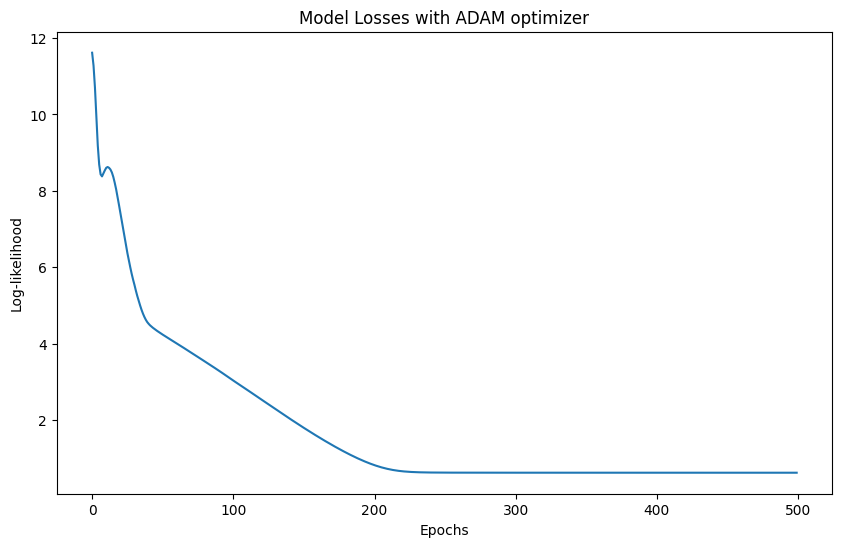

In [9]:
# plot model losses

plt.figure(figsize=(10, 6))
plt.plot(model.losses, label='ADAM')
plt.title('Model Losses with ADAM optimizer')
plt.xlabel('Epochs')
plt.ylabel('Log-likelihood')
plt.show()